In [2]:
from glob import glob as glob
from pathlib import Path
import pandas as pd
from sklearn import preprocessing
import json

csvs = glob('./BayesNetOutputs/Absolute/*_Matrix.csv')

In [3]:
csvs

['./BayesNetOutputs/Absolute/NSW_SEC_Matrix.csv',
 './BayesNetOutputs/Absolute/QLD_Matrix.csv',
 './BayesNetOutputs/Absolute/VIC_LD_Matrix.csv',
 './BayesNetOutputs/Absolute/NSW_BHILL_Matrix.csv',
 './BayesNetOutputs/Absolute/BM_Matrix.csv',
 './BayesNetOutputs/Absolute/NSW_NAN_Matrix.csv',
 './BayesNetOutputs/Absolute/ACT_Matrix.csv',
 './BayesNetOutputs/Absolute/VIC_Matrix.csv',
 './BayesNetOutputs/Absolute/NSW_SWS_Matrix.csv',
 './BayesNetOutputs/Absolute/SA_Matrix.csv',
 './BayesNetOutputs/Absolute/TAS_Matrix.csv']

name

In [73]:
from sklearn import preprocessing

for i in csvs:
    df = pd.read_csv(i)
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    name = df['region'][0]
    cols = df.columns.to_list()
    cols.remove('Edge_Treatment')
    cols.remove('Landscape_Treatment')
    cols.remove('region')
    
    x = df[cols].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=cols)
    fname = 'BayesNetOutputs/'+ name + '_normalised.csv'
    df.to_csv(fname)
    print('Wrote: %s' % fname)

Wrote: BayesNetOutputs/VIC_LD_normalised.csv
Wrote: BayesNetOutputs/VIC_normalised.csv
Wrote: BayesNetOutputs/TAS_normalised.csv
Wrote: BayesNetOutputs/NSW_SWS_normalised.csv
Wrote: BayesNetOutputs/ACT_normalised.csv
Wrote: BayesNetOutputs/BM_normalised.csv
Wrote: BayesNetOutputs/NSW_SEC_normalised.csv
Wrote: BayesNetOutputs/QLD_normalised.csv
Wrote: BayesNetOutputs/SA_normalised.csv
Wrote: BayesNetOutputs/NSW_NAN_normalised.csv
Wrote: BayesNetOutputs/NSW_BHILL_normalised.csv


In [71]:
# actual values
master = {}
master['areas'] = {}

for i in csvs:
    print(i)
    ds = pd.read_csv(i)
    ds.rename({'Unnamed: 0': 'id'}, axis=1, inplace=True)
    
    
    name = ds['region'][0]
    ds.drop(['region'], axis=1, inplace=True)
    
    ds["X"] = ds.apply(lambda x: int(x['Edge_Treatment']
                                 .replace('e', '')
                                 .replace('15', '6')
                                 .replace('5', '4')
                                 .replace('10', '5')),axis=1)

    ds["Y"] = ds.apply(lambda x: int(x['Landscape_Treatment'].replace('l', '')
                                     .replace('15', '6')
                                     .replace('5', '4')
                                     .replace('10', '5')),axis=1)

    ds.drop(['Edge_Treatment', 'Landscape_Treatment'], inplace=True, axis=1)

    cols = list(ds.columns)
    cols.remove('id')
    
    x = ds[cols].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    
    
    df = pd.DataFrame(x_scaled, columns=cols)
    
    o = json.loads(df.to_json(orient='records'))
    
    master['areas'][name] = o
    
    fname = './BayesNetOutputs/'+name+'_normalised.json'
    with open(fname, 'w') as f:
        f.write(json.dumps(o, indent=4))
    print('Wrote: %s' % fname)
    

fname = './BayesNetOutputs/master_normalised.json'
with open(fname, 'w') as f:
    f.write(json.dumps(master, indent=4))
    print('Wrote: %s' % fname)

./BayesNetOutputs/Absolute/NSW_SEC_Matrix.csv
Wrote: ./BayesNetOutputs/NSW_SEC_normalised.json
./BayesNetOutputs/Absolute/QLD_Matrix.csv
Wrote: ./BayesNetOutputs/QLD_normalised.json
./BayesNetOutputs/Absolute/VIC_LD_Matrix.csv
Wrote: ./BayesNetOutputs/VIC_LD_normalised.json
./BayesNetOutputs/Absolute/NSW_BHILL_Matrix.csv
Wrote: ./BayesNetOutputs/NSW_BHILL_normalised.json
./BayesNetOutputs/Absolute/BM_Matrix.csv
Wrote: ./BayesNetOutputs/BM_normalised.json
./BayesNetOutputs/Absolute/NSW_NAN_Matrix.csv
Wrote: ./BayesNetOutputs/NSW_NAN_normalised.json
./BayesNetOutputs/Absolute/ACT_Matrix.csv
Wrote: ./BayesNetOutputs/ACT_normalised.json
./BayesNetOutputs/Absolute/VIC_Matrix.csv
Wrote: ./BayesNetOutputs/VIC_normalised.json
./BayesNetOutputs/Absolute/NSW_SWS_Matrix.csv
Wrote: ./BayesNetOutputs/NSW_SWS_normalised.json
./BayesNetOutputs/Absolute/SA_Matrix.csv
Wrote: ./BayesNetOutputs/SA_normalised.json
./BayesNetOutputs/Absolute/TAS_Matrix.csv
Wrote: ./BayesNetOutputs/TAS_normalised.json
Wrote

In [11]:
cols

['Fire_area',
 'House_loss',
 'Life_loss',
 'Road_loss',
 'Power_loss',
 'TFI_burnt']

In [72]:
ds.describe()

,id,Fire_area,House_loss,Life_loss,Road_loss,Power_loss,TFI_burnt,X,Y
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,1549.039013,6.116952,0.476214,14261.370695,835.390611,144.298787,3.000000,3.000000
std,14.28869,110.544273,1.626863,0.125848,1776.039488,110.411755,8.680585,2.020726,2.020726
min,1.00000,1335.482212,3.457312,0.293694,11165.499652,631.500905,130.357589,0.000000,0.000000
25%,13.00000,1446.781368,4.385009,0.344917,12493.928088,721.395449,137.950355,1.000000,1.000000
50%,25.00000,1565.624927,6.406948,0.456624,14744.156027,843.373752,144.526065,3.000000,3.000000
75%,37.00000,1632.700457,7.279312,0.571011,15731.495986,923.512467,152.167393,5.000000,5.000000
max,49.00000,1730.369993,8.700830,0.737241,17172.271730,1017.156899,159.548630,6.000000,6.000000


In [73]:
df.describe()

,Fire_area,House_loss,Life_loss,Road_loss,Power_loss,TFI_burnt,X,Y
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.540804,0.507224,0.411500,0.515397,0.528683,0.477585,0.500000,0.500000
std,0.279938,0.310262,0.283730,0.295673,0.286296,0.297372,0.336788,0.336788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.281850,0.176923,0.115484,0.221155,0.233095,0.260106,0.166667,0.166667
50%,0.582805,0.562530,0.367335,0.595770,0.549383,0.485371,0.500000,0.500000
75%,0.752665,0.728900,0.625225,0.760141,0.757181,0.747140,0.833333,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
ds = pd.read_csv(csvs[0])
ds.rename({'Unnamed: 0': 'id'}, axis=1, inplace=True)

In [48]:
ds.drop(['id','region'], axis=1, inplace=True)

In [50]:
ds

,Edge_Treatment,Landscape_Treatment,Fire_area,House_loss,Life_loss,Road_loss,Power_loss,TFI_burnt,X
0,e0,l0,763.538143,0.470364,0.245673,6652.502282,20.796950,48.120626,0
1,e0,l1,701.208628,0.462887,0.241760,5530.660949,20.798978,57.714638,0
2,e0,l2,644.514892,0.464806,0.245414,4985.853285,20.801052,64.033889,0
3,e0,l3,610.917235,0.452326,0.241363,4438.414770,20.802072,72.741100,0
4,e0,l5,516.447662,0.446283,0.241700,3416.756597,20.805010,76.844126,0
5,e0,l10,469.096919,0.434876,0.236009,2805.191146,20.807252,80.762353,0
6,e0,l15,454.119026,0.431270,0.233234,2644.834386,20.808520,76.581965,0
7,e1,l0,741.891968,0.430359,0.238555,6472.540999,20.798066,49.965729,1
8,e1,l1,683.776313,0.429031,0.235598,5347.684322,20.799964,60.304783,1
9,e1,l2,632.943511,0.428071,0.235796,4757.684270,20.801877,66.324456,1


In [70]:
ds

,Fire_area,House_loss,Life_loss,Road_loss,Power_loss,TFI_burnt,X,Y
0,763.538143,0.470364,0.245673,6652.502282,20.796950,48.120626,0,0
1,701.208628,0.462887,0.241760,5530.660949,20.798978,57.714638,0,1
2,644.514892,0.464806,0.245414,4985.853285,20.801052,64.033889,0,2
3,610.917235,0.452326,0.241363,4438.414770,20.802072,72.741100,0,3
4,516.447662,0.446283,0.241700,3416.756597,20.805010,76.844126,0,4
5,469.096919,0.434876,0.236009,2805.191146,20.807252,80.762353,0,5
6,454.119026,0.431270,0.233234,2644.834386,20.808520,76.581965,0,6
7,741.891968,0.430359,0.238555,6472.540999,20.798066,49.965729,1,0
8,683.776313,0.429031,0.235598,5347.684322,20.799964,60.304783,1,1
9,632.943511,0.428071,0.235796,4757.684270,20.801877,66.324456,1,2


In [53]:

ds

,Fire_area,House_loss,Life_loss,Road_loss,Power_loss,TFI_burnt,X,Y
0,763.538143,0.470364,0.245673,6652.502282,20.796950,48.120626,0,0
1,701.208628,0.462887,0.241760,5530.660949,20.798978,57.714638,0,1
2,644.514892,0.464806,0.245414,4985.853285,20.801052,64.033889,0,2
3,610.917235,0.452326,0.241363,4438.414770,20.802072,72.741100,0,3
4,516.447662,0.446283,0.241700,3416.756597,20.805010,76.844126,0,4
5,469.096919,0.434876,0.236009,2805.191146,20.807252,80.762353,0,5
6,454.119026,0.431270,0.233234,2644.834386,20.808520,76.581965,0,6
7,741.891968,0.430359,0.238555,6472.540999,20.798066,49.965729,1,0
8,683.776313,0.429031,0.235598,5347.684322,20.799964,60.304783,1,1
9,632.943511,0.428071,0.235796,4757.684270,20.801877,66.324456,1,2


In [64]:
import numpy as np

In [65]:
X = list(set(list(ds["X"].values)))
Y = list(set(list(ds["Y"].values)))
X, Y = np.meshgrid(X, Y)

In [69]:

ds["House_loss"]

0.294756026487448

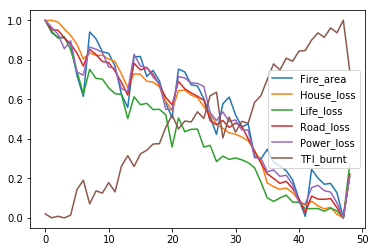

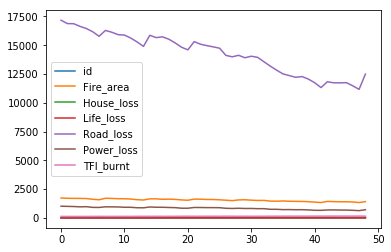

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X = list(set(list(ds["X"].values)))
Y = list(set(list(ds["Y"].values)))
X, Y = np.meshgrid(X, Y)

Z = ds["House_loss"]
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()